# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.170421e+01     7.533942e+00
 * time: 0.0019249916076660156
     1     2.973801e+01     4.268165e+00
 * time: 0.007739067077636719
     2     1.930634e+01     3.607555e+00
 * time: 0.013942956924438477
     3     1.432098e+01     2.621732e+00
 * time: 0.01882314682006836
     4     1.352677e+01     4.140880e+00
 * time: 0.02238917350769043
     5     1.080453e+01     1.860736e+00
 * time: 0.026999950408935547
     6     9.582339e+00     2.390988e+00
 * time: 0.03054499626159668
     7     8.693256e+00     1.494841e+00
 * time: 0.034317970275878906
     8     8.350896e+00     8.704380e-01
 * time: 0.038236141204833984
     9     8.208056e+00     1.161895e+00
 * time: 0.04268312454223633
    10     8.096977e+00     7.326852e-01
 * time: 0.04789996147155762
    11     8.000998e+00     7.187436e-01
 * time: 0.05252695083618164
    12     7.998109e+00     1.029045e+00
 * time: 0.05609416961669922
    13     7.954614e+00     6.417572e-01
 

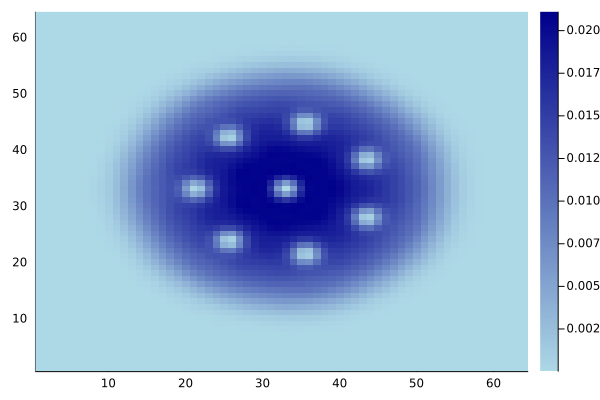

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)